###### Importing the libs

In [43]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [44]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

###### Loading the dataset

In [80]:
car_price = pd.read_csv("/content/CarPrice_prediction.csv")
car_price.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### Data preprocessing

###### Checking datatype

In [81]:
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

###### Checking null values

In [82]:
car_price.isnull().sum()

,0
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


###### Checking outliers

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

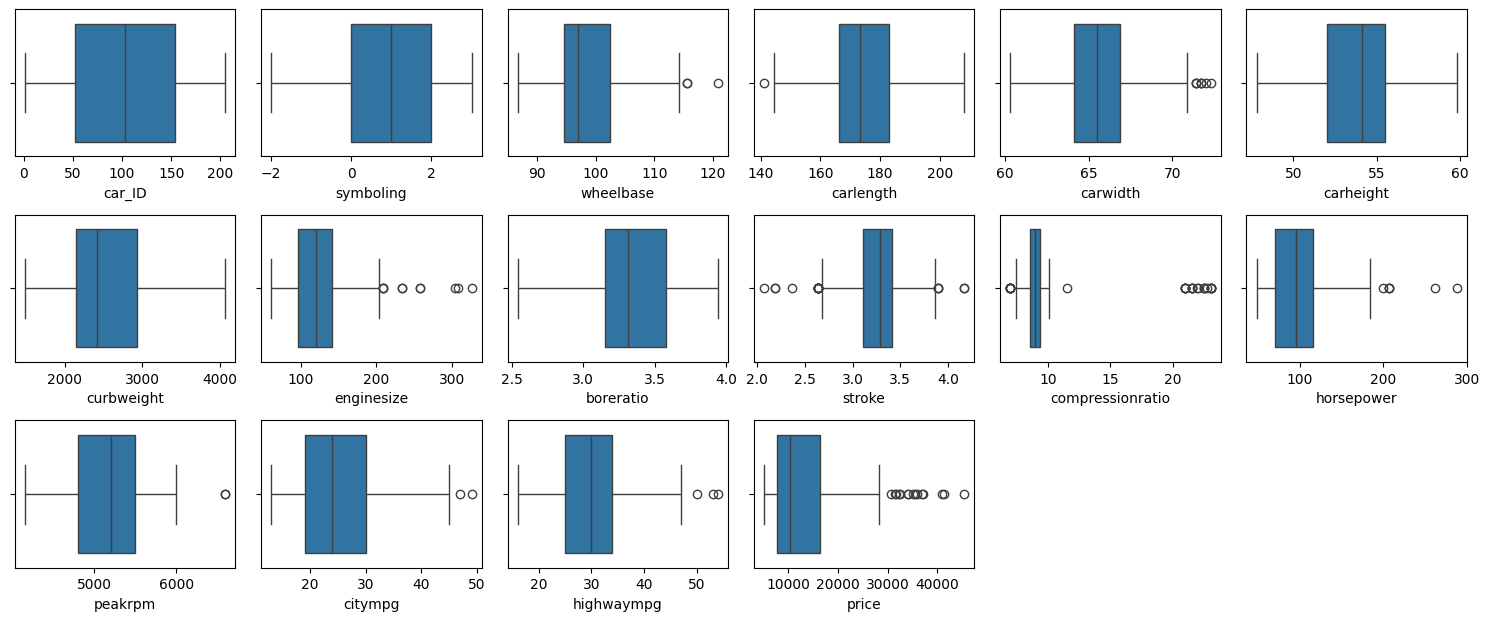

In [84]:
numerical_columns = car_price.select_dtypes(include=['int64', 'float64']).columns

# Creating box plots for each numerical column
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(5, 6, i)
    sns.boxplot(x=car_price[column])
    plt.xlabel(column)

plt.tight_layout()
plt.show()

From the business perspective, we cannot actually remove the outliers from this will affect the prediction

### Data Visualization

###### Numerical data

In [50]:
numeric_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio',
                'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

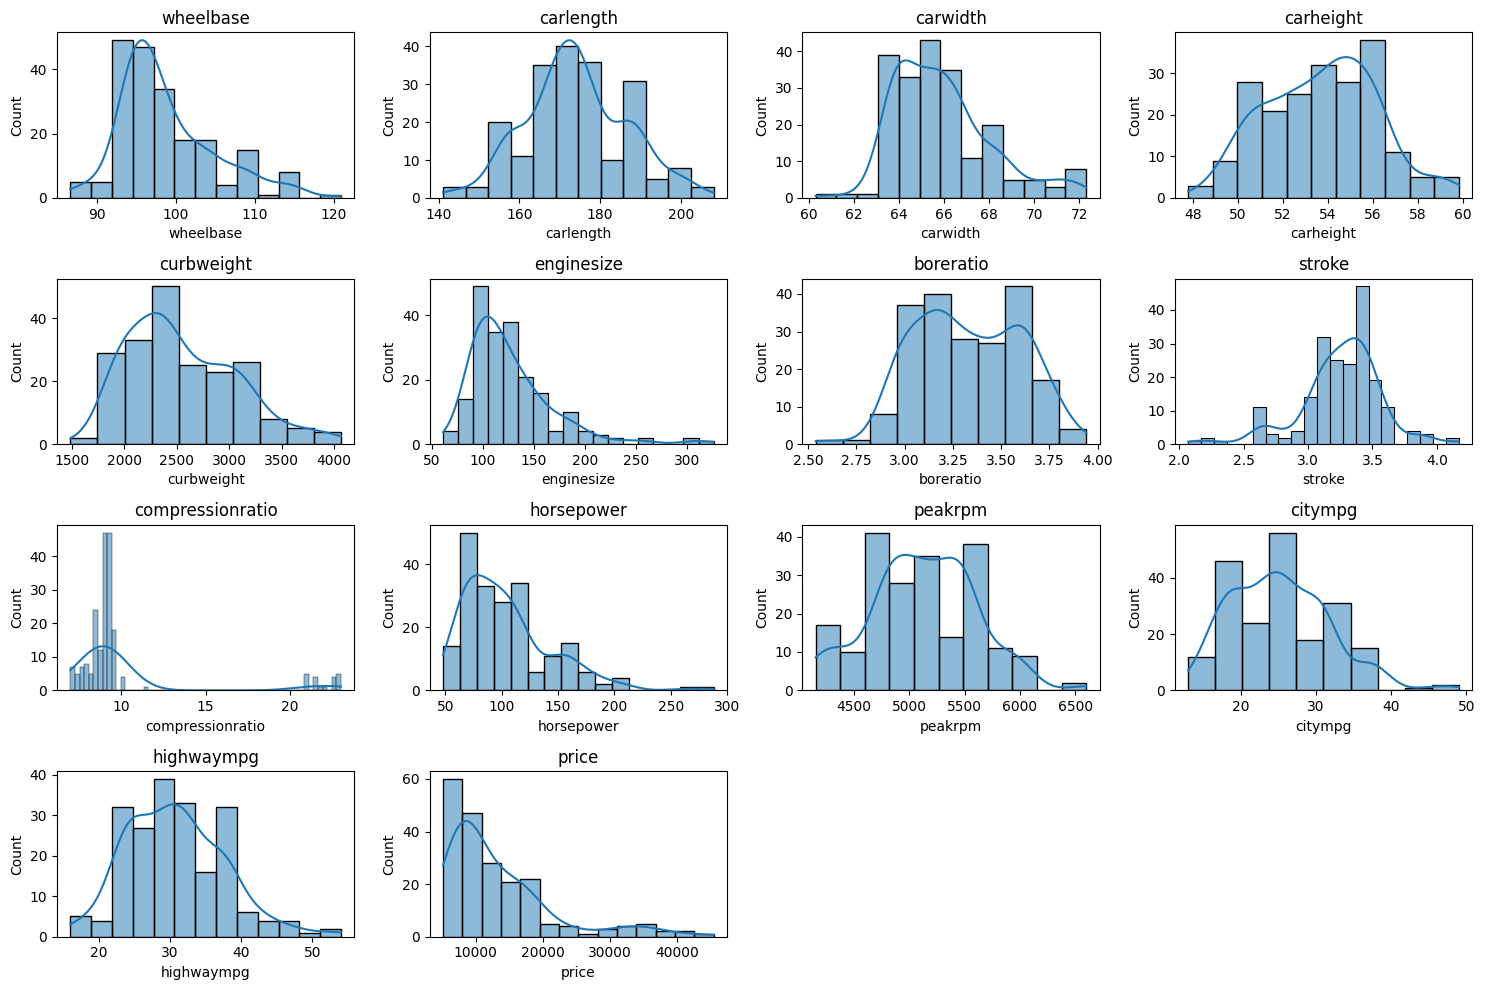

In [51]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_vars, 1):
    plt.subplot(4, 4, i)
    sns.histplot(car_price[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

###### Categorical data

In [52]:
categorical_vars = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation',
                    'enginetype', 'cylindernumber', 'fuelsystem']

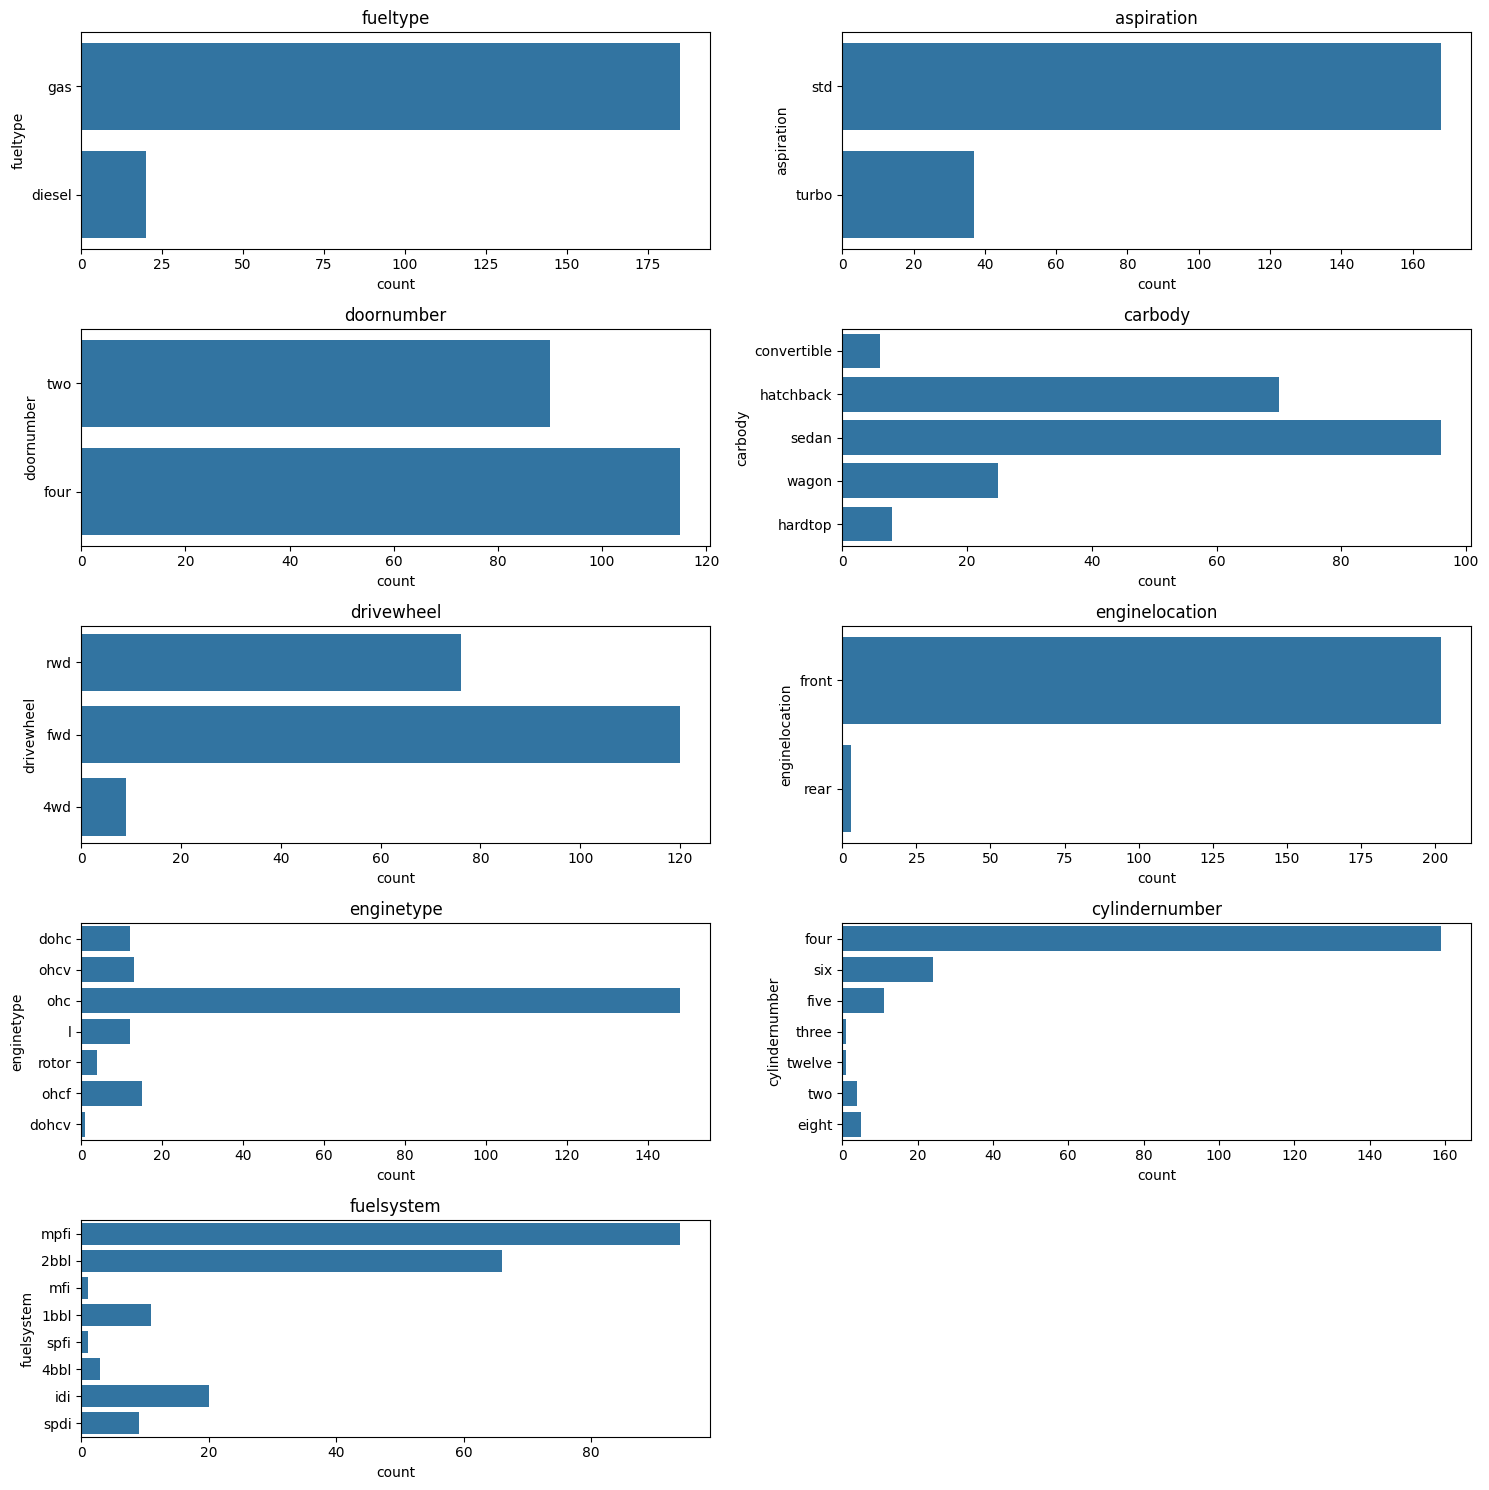

In [53]:
plt.figure(figsize=(15, 15))
for i, col in enumerate(categorical_vars, 1):
    plt.subplot(5, 2, i)
    sns.countplot(y=car_price[col])
    plt.title(col)
plt.tight_layout()
plt.show()

### Converting the categorical variables to numerical variable

###### Hot encoding

In [54]:
dummy_status = pd.get_dummies(car_price[['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation',
                     'enginetype', 'cylindernumber', 'fuelsystem']], drop_first=True)
dummy_status = dummy_status.astype(int)

car_price = pd.concat([car_price,dummy_status], axis = 1)

car_price.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [55]:
car_price.drop(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation',
                     'enginetype', 'cylindernumber', 'fuelsystem'],axis = 1, inplace = True)
car_price.head()

,car_ID,symboling,CarName,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,alfa-romero giulia,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,2,3,alfa-romero stelvio,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,3,1,alfa-romero Quadrifoglio,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,4,2,audi 100 ls,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,5,2,audi 100ls,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [56]:
car_price.shape

(205, 46)

###### Removing the car_id and car name  columns from the dataset

In [57]:
car_price.drop(['car_ID','CarName'], axis = 1, inplace=True)

###### Checking the correlation between the price and other variables

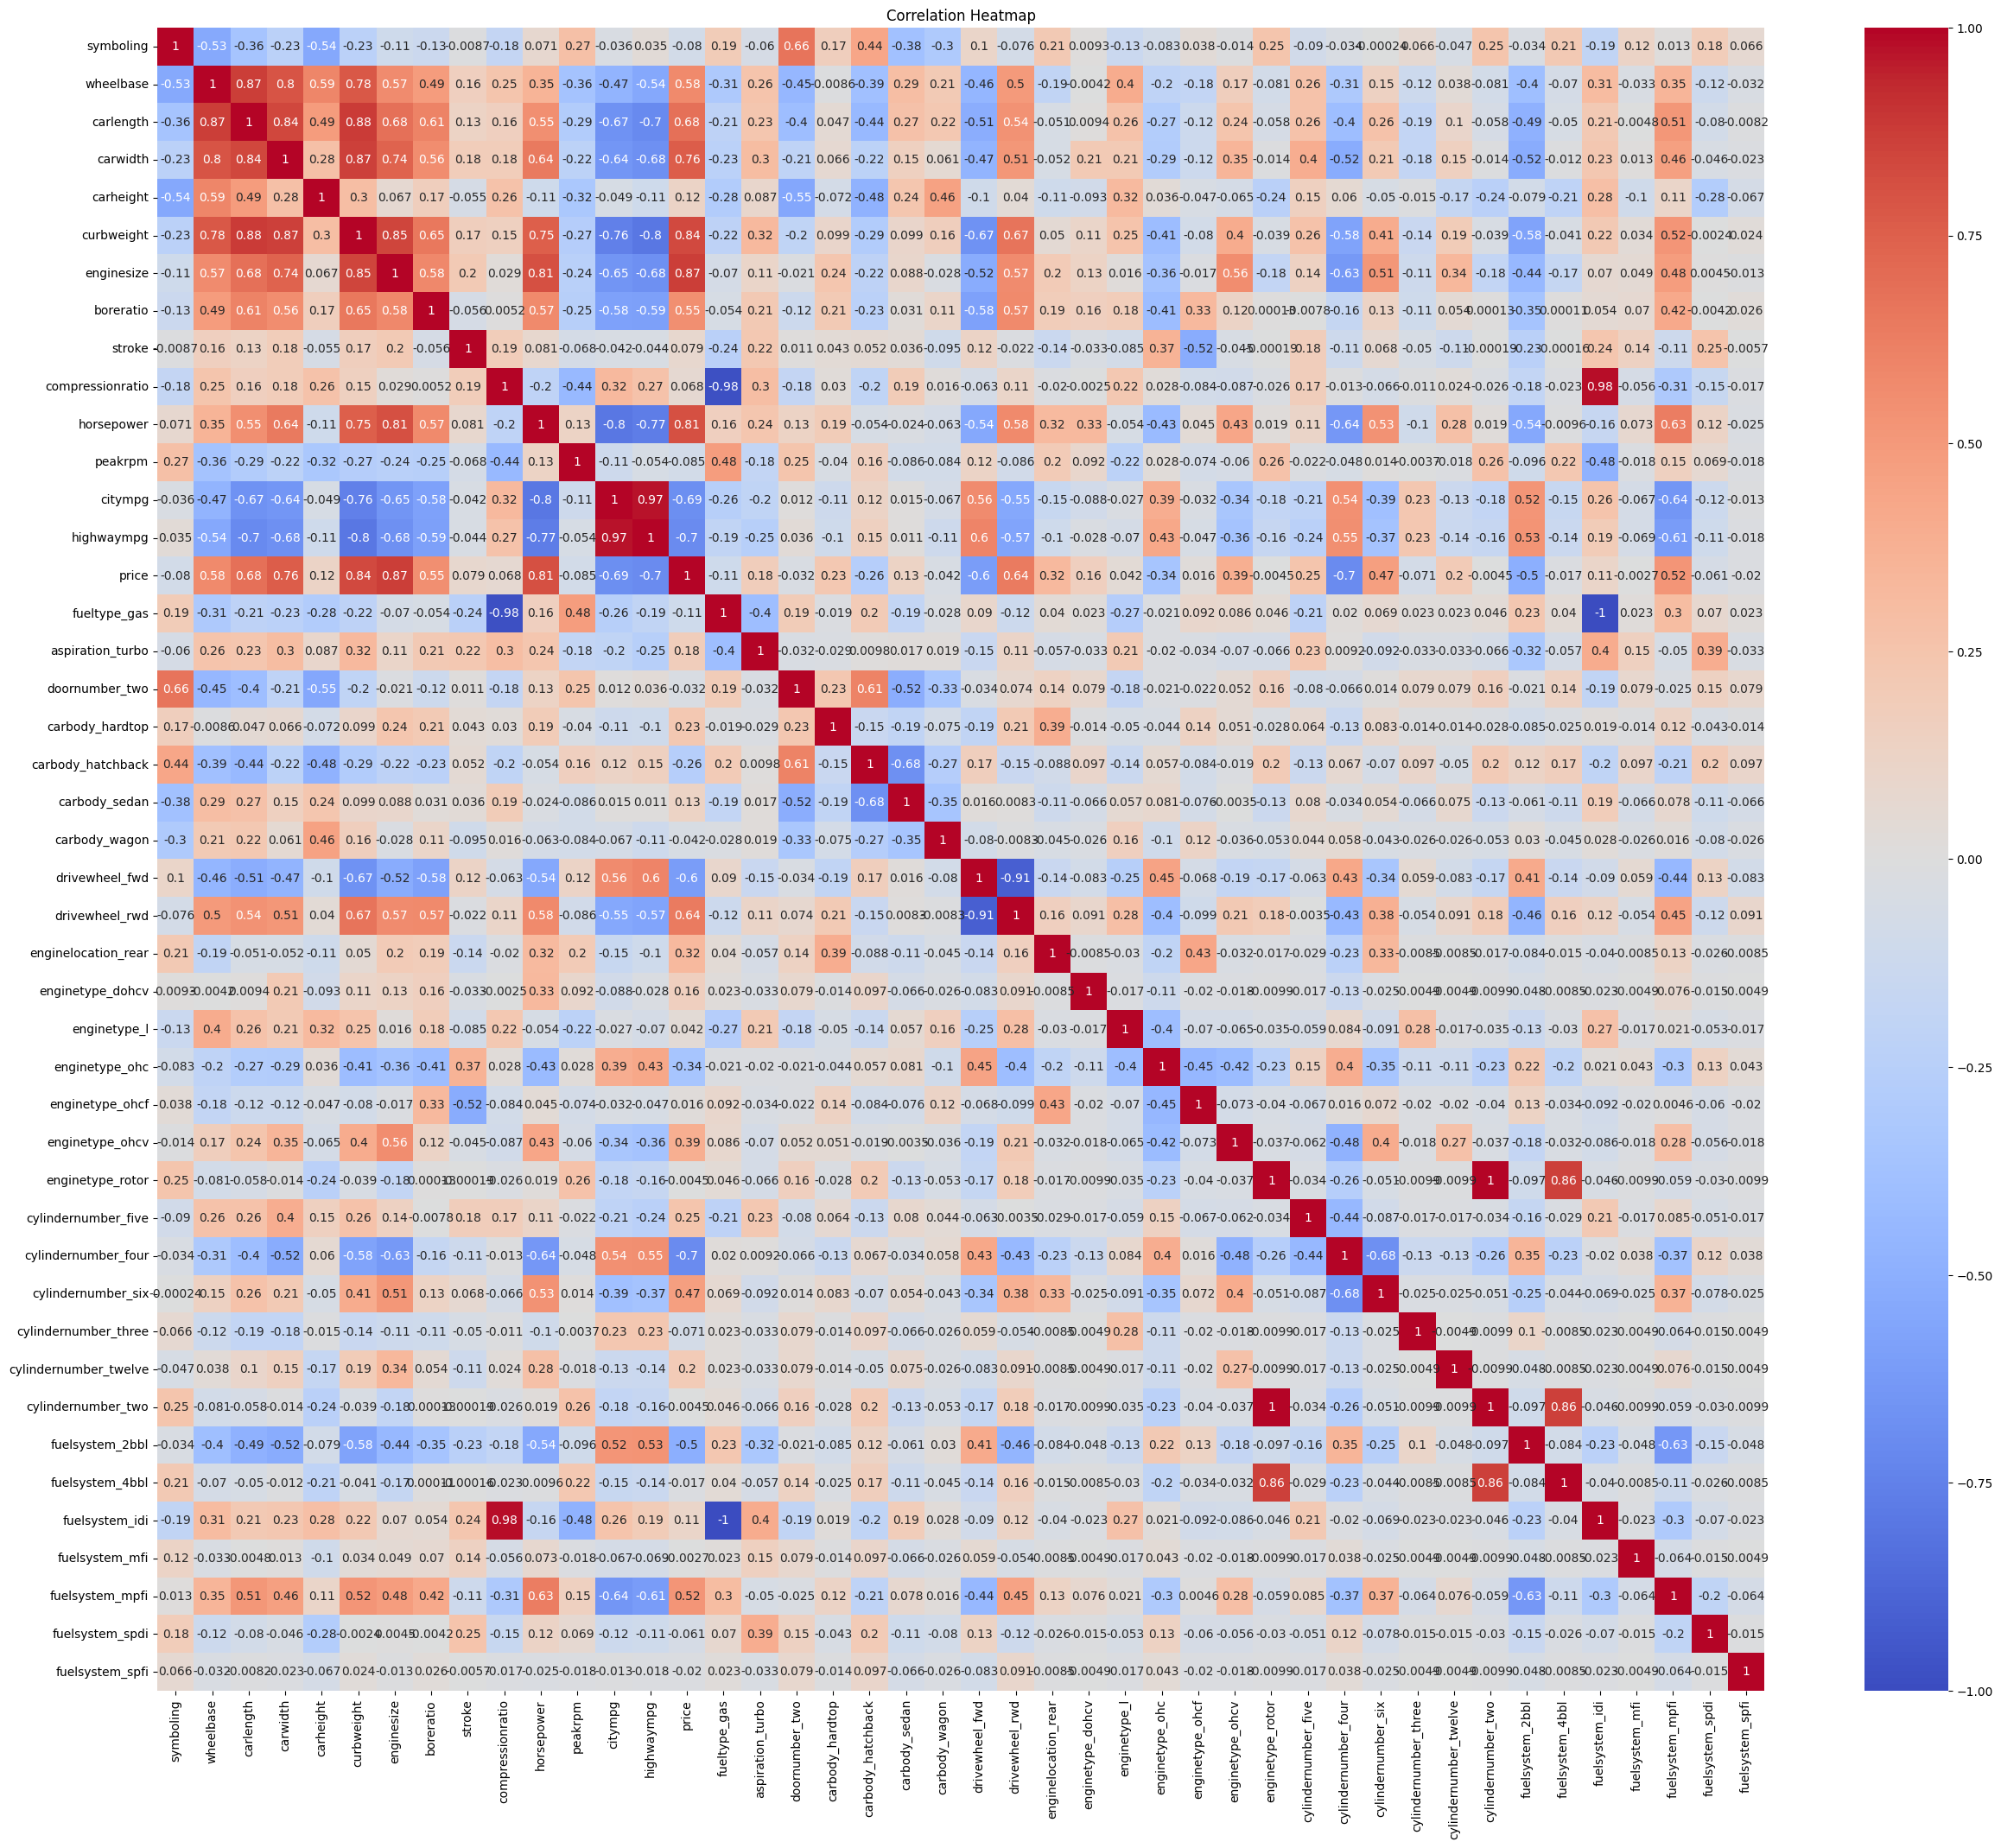

In [58]:
corr_matrix = car_price.corr()
plt.figure(figsize=(30, 25))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [59]:
car_price.shape

(205, 44)

### Implementing Linear regression

###### Splitting the dataset to train and test

In [60]:
from sklearn.model_selection import train_test_split


X = car_price.drop(columns=['price'])
y = car_price['price']

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
X_train.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
66,0,104.9,175.0,66.1,54.4,2700,134,3.43,3.64,22.0,72,4200,31,39,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
111,0,107.9,186.7,68.4,56.7,3075,120,3.46,2.19,8.4,95,5000,19,24,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
153,0,95.7,169.7,63.6,59.1,2280,92,3.05,3.03,9.0,62,4800,31,37,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
96,1,94.5,165.3,63.8,54.5,1971,97,3.15,3.29,9.4,69,5200,31,37,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
38,0,96.5,167.5,65.2,53.3,2289,110,3.15,3.58,9.0,86,5800,27,33,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


###### Scaling

In [62]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [63]:
num_vars = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

X_train.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
66,0,0.631034,0.524138,0.409524,0.550000,0.392078,0.250000,0.635714,0.747619,0.9375,0.084746,0.020408,0.5625,0.676471,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
111,0,0.734483,0.725862,0.628571,0.741667,0.558968,0.195312,0.657143,0.057143,0.0875,0.182203,0.346939,0.1875,0.235294,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
153,0,0.313793,0.432759,0.171429,0.941667,0.205162,0.085938,0.364286,0.457143,0.1250,0.042373,0.265306,0.5625,0.617647,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
96,1,0.272414,0.356897,0.190476,0.558333,0.067646,0.105469,0.435714,0.580952,0.1500,0.072034,0.428571,0.5625,0.617647,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
38,0,0.341379,0.394828,0.323810,0.458333,0.209168,0.156250,0.435714,0.719048,0.1250,0.144068,0.673469,0.4375,0.500000,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [64]:
X_test[num_vars] = scaler.transform(X_test[num_vars])

X_test.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
15,0,0.582759,0.765517,0.485714,0.658333,0.627948,0.542969,0.771429,0.628571,0.062500,0.550847,0.510204,0.09375,0.176471,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
9,0,0.444828,0.579310,0.580952,0.350000,0.549177,0.238281,0.421429,0.633333,0.000000,0.457627,0.551020,0.09375,0.176471,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
100,0,0.365517,0.496552,0.323810,0.575000,0.214953,0.195312,0.564286,0.666667,0.093750,0.190678,0.428571,0.43750,0.529412,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
132,3,0.431034,0.724138,0.447619,0.691667,0.373387,0.199219,0.714286,0.476190,0.144375,0.245763,0.448980,0.25000,0.352941,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
68,-1,0.806897,0.798276,0.809524,0.908333,0.859368,0.441406,0.742857,0.747619,0.906250,0.300847,0.081633,0.28125,0.264706,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


###### Feature selection using RFE

In [65]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [66]:
lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(estimator=lm, n_features_to_select=10)
rfe = rfe.fit(X_train,y_train)

In [67]:
col = X_train.columns[rfe.support_]
col

Index(['carwidth', 'curbweight', 'enginesize', 'stroke', 'enginelocation_rear',
       'enginetype_ohcv', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_twelve'],
      dtype='object')

In [68]:
X_train.columns[~rfe.support_]

Index(['symboling', 'wheelbase', 'carlength', 'carheight', 'boreratio',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'fueltype_gas', 'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_rotor', 'cylindernumber_three',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')

In [69]:
X_train_rfe = X_train[col]

###### Using statsmodel

In [70]:
import statsmodels.api as sm

In [71]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [72]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [73]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     139.3
Date:                Wed, 22 Jan 2025   Prob (F-statistic):           1.50e-71
Time:                        11:45:34   Log-Likelihood:                -1511.1
No. Observations:                 164   AIC:                             3044.
Df Residuals:                     153   BIC:                             3078.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.254e+04   1498.091      8.372      0.000    9581.733    1.55e+04
carwidth               6081.3182   2186.927      2.781      0.006    1760.846    1.04e+04
curbweight             7245.2160   2228.164      3.252      0.001    2843.277    1.16e+04
enginesize             2.564e+04   3316.699      7.731      0.000    1.91e+04    3.22e+04
stroke                -4689.8569   1443.567     -3.249      0.001   -7541.754   -1837.960
enginelocation_rear    1.247e+04   1817.033      6.863      0.000    8880.205    1.61e+04
enginetype_ohcv       -4061.7907   1146.996     -3.541      0.001   -6327.785   -1795.797
cylindernumber_five   -4406.6174   1506.369     -2.925      0.004   -7382.585   -1430.650
cylindernumber_four   -7728.8707   1150.848     -6.716      0.000      -1e+04   -5455.267
cylindernumber_six    -5971.3420   1217.802     -4.903      0.000   -8377.219   -3565.465
cylindernumber_twelve -8547.3587   3130.907     -2.730      0.007   -1.47e+04   -2361.969
==============================================================================
Omnibus:                        6.221   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.045   Jarque-Bera (JB):                5.960
Skew:                           0.382   Prob(JB):                       0.0508
Kurtosis:                       3.538   Cond. No.                         32.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### Residual analysis

In [74]:
y_train_pred = lm.predict(X_train_rfe)

In [75]:
res = (y_train - y_train_pred)

<Axes: ylabel='Density'>

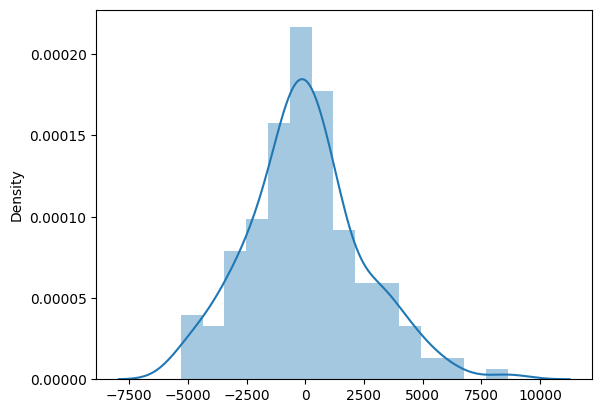

In [76]:
sns.distplot(res)

###### Making predictions

In [77]:
X_test_new = X_test[col]

X_test_new = sm.add_constant(X_test_new)

y_pred = lm.predict(X_test_new)

In [78]:
from sklearn.metrics import r2_score

r2_score = r2_score(y_test,y_pred)
r2_score

0.8621318839895223

In [79]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,y_pred)

10883863.428970214